#### Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

48629
1719339645.000044
Filtered data saved to /Users/iagosenenfernandezgarcia/Documents/tfg/Data_Cleaning/Cleaned_flights/flight1.csv


IndexError: single positional indexer is out-of-bounds

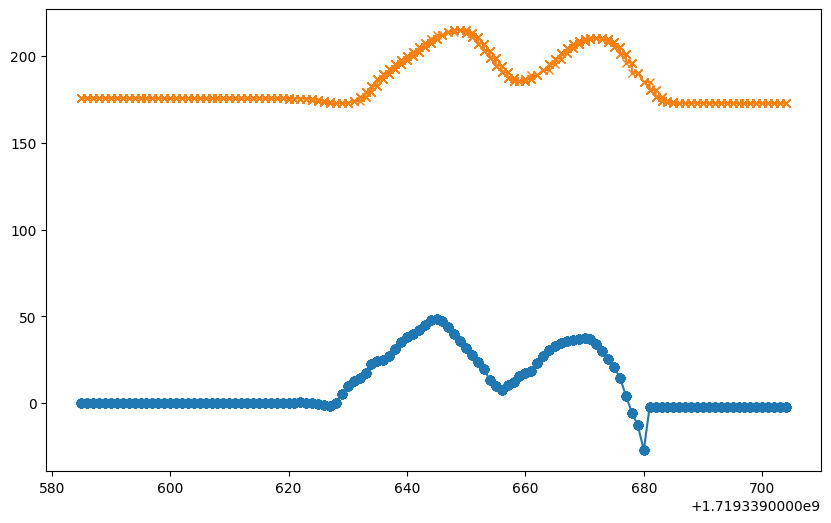

In [30]:
# Path to the dataset
path_to_dataset = "../Data_Adquisition/Flight_Logs/2024-06-25.csv"

# Read the CSV file
df = pd.read_csv(path_to_dataset)

# Check if the necessary columns are present
required_columns = ['locationAltitude(m)', 'locationTimestamp_since1970(s)', 'altimeterRelativeAltitude(m)']
if all(column in df.columns for column in required_columns):
    # Identify the peak altitude
    #peak_index = 84000
    peak_index = df['locationAltitude(m)'].idxmax()
    print(peak_index)
    peak_timestamp = df.loc[peak_index, 'locationTimestamp_since1970(s)']
    print(peak_timestamp)
    
    # Define the time window ± X amount of seconds 
    time_window = 60

    # Filter the data within the time window
    start_time = peak_timestamp - time_window
    end_time = peak_timestamp + time_window
    filtered_df = df[(df['locationTimestamp_since1970(s)'] >= start_time) & (df['locationTimestamp_since1970(s)'] <= end_time)].copy()

    # Normalize the locationAltitude(m)
    initial_location_altitude = filtered_df['locationAltitude(m)'].iloc[0]
    filtered_df['normalizedLocationAltitude(m)'] = filtered_df['locationAltitude(m)'] - initial_location_altitude

    save=False
    if save == True:
        # Get the current working directory (where the notebook is being executed)
        current_directory = os.getcwd()
        # Create the "Cleaned_flights" directory if it doesn't exist
        output_directory = os.path.join(current_directory, "Cleaned_flights")
        os.makedirs(output_directory, exist_ok=True)
        
        # Define the path for the output file
        output_path = os.path.join(output_directory, "flight1.csv")
        
        # Save the filtered DataFrame to "flight1.csv"
        filtered_df.to_csv(output_path, index=False)
        print(f"Filtered data saved to {output_path}")

    # Plotting the filtered data
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df['locationTimestamp_since1970(s)'], filtered_df['normalizedLocationAltitude(m)'], marker='o', linestyle='-', label='Normalized Location Altitude (m)')
    plt.plot(filtered_df['locationTimestamp_since1970(s)'], filtered_df['altimeterRelativeAltitude(m)'], marker='x', linestyle='-', label='Altimeter Relative Altitude (m)')

    # Mark the peak point
    plt.plot(peak_timestamp, filtered_df['normalizedLocationAltitude(m)'].iloc[filtered_df['locationTimestamp_since1970(s)'].idxmax()], 'ro', label='Peak Location Altitude')  # Red dot for peak

    # Adding titles and labels
    plt.title('Altitude vs Timestamp (Around Peak)')
    plt.xlabel('Timestamp since 1970 (s)')
    plt.ylabel('Altitude (m)')
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()
else:
    print("Required columns are not present in the dataset.")


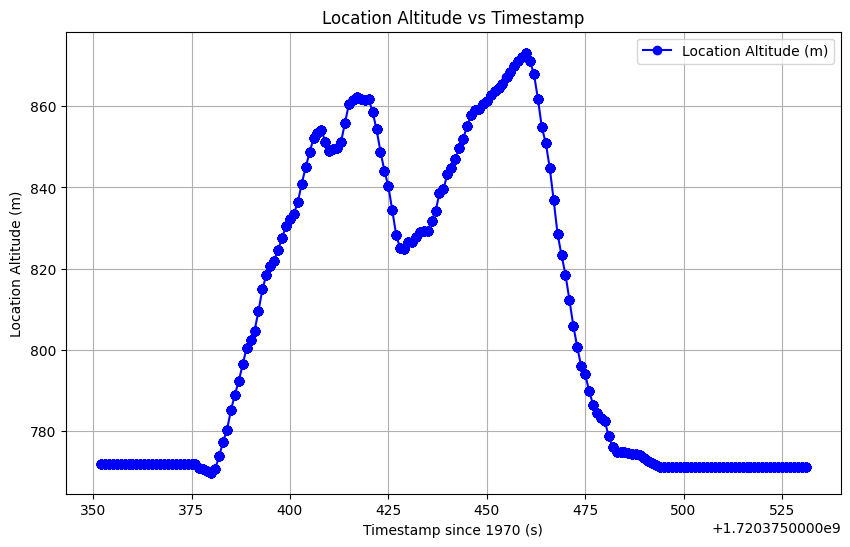

In [3]:
# Define the path to the "Cleaned_flights" folder
current_directory = os.getcwd()
cleaned_flights_directory = os.path.join(current_directory, "Cleaned_flights")

# Path to the filtered dataset
filtered_file_path = os.path.join(cleaned_flights_directory, "flight1.csv")

# Read the filtered CSV file
filtered_df = pd.read_csv(filtered_file_path)

# Check if the necessary columns are present in the filtered dataset
if 'locationAltitude(m)' in filtered_df.columns and 'locationTimestamp_since1970(s)' in filtered_df.columns:
    # Plot 'locationAltitude(m)' vs 'locationTimestamp_since1970(s)'
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df['locationTimestamp_since1970(s)'], filtered_df['locationAltitude(m)'], marker='o', linestyle='-', color='b', label='Location Altitude (m)')
    
    # Adding titles and labels
    plt.title('Location Altitude vs Timestamp')
    plt.xlabel('Timestamp since 1970 (s)')
    plt.ylabel('Location Altitude (m)')
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()
else:
    print("Required columns are not present in the filtered dataset.")